---

# Single Neuron Logistic Regression

Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on. Logistic regression can be a useful analysis method for classifiction problems,where you are trying to determine if a new sample fits best into a category. As aspects of cyber security are classification problems, such as attack detection, logistic regression is a useful analytic technique. 



---

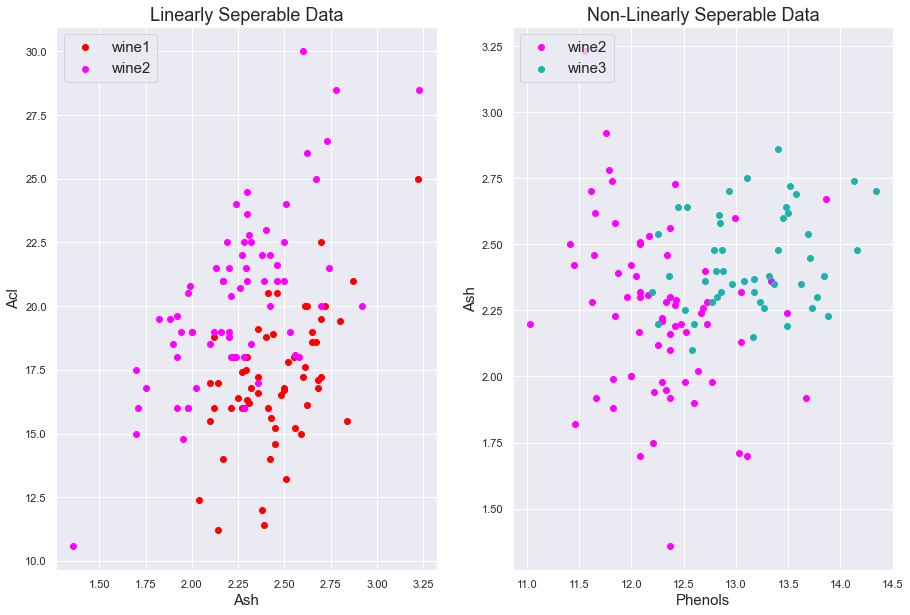

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

sns.set_theme()

df = pd.read_csv("/Users/mingzeyuan/Desktop/Rice/22 Spring/INDE577/Final/Data/wine.csv")

w1 = df[df.Wine == 1]
w2 = df[df.Wine == 2]
w3 = df[df.Wine == 3]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(w1.Ash, 
            w1.Acl, 
            color = "red", 
            label = "wine1")
ax1.scatter(w2.Ash, 
            w2.Acl, 
            color = "magenta", 
            label = "wine2")
ax1.set_xlabel("Ash", fontsize = 15)
ax1.set_ylabel("Acl", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Seperable Data", fontsize = 18)


ax2.scatter(w2.Alcohol, 
            w2.Ash, 
            color = "magenta", 
            label = "wine2")
ax2.scatter(w3.Alcohol, 
            w3.Ash, 
            color = "lightseagreen", 
            label = "wine3")
ax2.set_xlabel("Phenols", fontsize = 15)
ax2.set_ylabel("Ash", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
ax2.set_title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

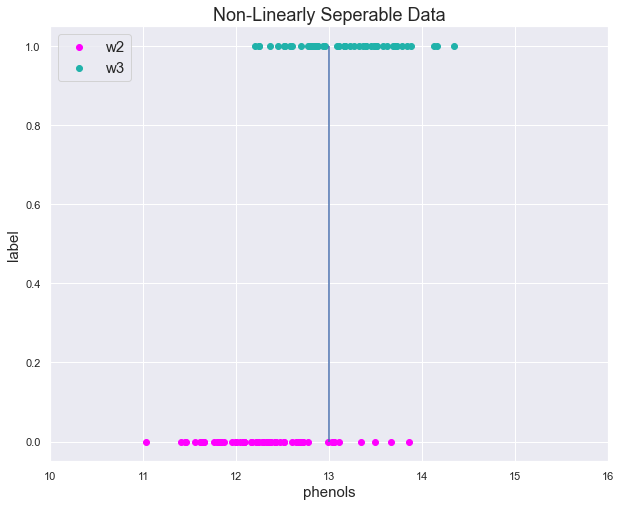

In [8]:
plt.figure(figsize = (10, 8))
plt.xlim((10, 16 ))
plt.scatter(w2.Alcohol, 
            np.zeros(71), 
            color = "magenta", 
            label = "w2")
plt.scatter(w3.Alcohol, 
            np.ones(48), 
            color = "lightseagreen", 
            label = "w3")
plt.vlines(13, 0.0, 1.0)
plt.xlabel("phenols", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

---

### The Sigmoid Activation Function

As before (both with the linear regression and Perceptron single neurons), we must first decide on an activation function before deciding on a cost/ loss function. For this purpose, we choose the *sigmoid* activation function:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

This differentiable function has a range in $(0, 1)$, so it would seem suitable for a possible function to turn the pre-activation value into a value representing a probability. Moreover, the sigmoid function (sometimes called the *logistic function*) has a smooth "S"-shape that is perfect for probabilities values transitioning, either growing or shrinking, as the input feature changes. For example, run the following code in the cell below. 


---

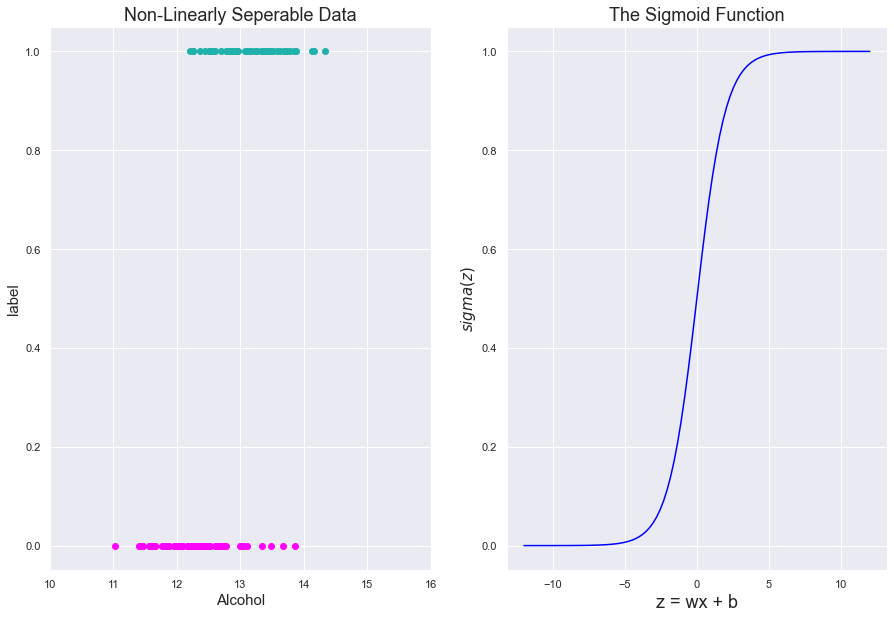

In [9]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.set_xlim((10,16))
ax1.scatter(w2.Alcohol, 
            np.zeros(71), 
            color = "magenta", 
            label = "wine2")
ax1.scatter(w3.Alcohol, 
            np.ones(48), 
            color = "lightseagreen", 
            label = "wine3")
ax1.set_xlabel("Alcohol", fontsize = 15)
ax1.set_ylabel("label", fontsize = 15)
ax1.set_title("Non-Linearly Seperable Data", fontsize = 18)


domain = np.linspace(-12.0, 12.0, 100)
ax2.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize = 18)
ax2.set_ylabel("$sigma(z)$", fontsize = 15)
ax2.set_title("The Sigmoid Function", fontsize = 18)
plt.show()

---

## The Binary Cross Entropy Loss Function 
Currently we have two target values, 0 for versicolor and 1 for virginica. Moreover, we are wishing to predict that *probability of each of these labels given a single feature measurement*. Thus, we encounter the conditional probability function:

$$
P\Big(y^{(i)}\mid x^{(i)}\Big)=\begin{cases}
          \hat{y}^{(i)}, \quad &  y^{(i)} = 1 \\
          1-\hat{y}^{(i)}, \quad & y^{(i)} = 0 \\
     \end{cases}
$$

Notice that this conditional probability depends on the value of $\hat{y}^{(i)}$, which in-turn depends on the values of our weight and bias. Moreover, we wish to *maximize* this probability over all training examples since this quantity is largest when our predicted probabilities are close approximations to the true 0-1 labels. Thus, we seek to solve the following maximization problem:

$$
\max_{\mathbf{w}, b} \sum_{i=1}^{N}P\Big(y^{(i)}\mid x^{(i)}\Big).
$$

Before considering this optimization problem, we next recall the famous Bernoulli formula for binary probabilities:
$$
P\Big(y^{(i)}\mid x^{(i)}\Big) = [\hat{y}^{(i)}]^{y}[1 - \hat{y}^{(i)}]^{(1-y)}
$$

Taking the logorithm on both sides of this equation yields (dropping the index notation to avoid messy equations):
$$
\begin{align} 
\log P\Big(y^{(i)}\mid x^{(i)}\Big)&= \log \hat{y}^{y}(1 - \hat{y})^{(1-y)}\\ 
&= y\log \hat{y} + (1-y) \log (1 - \hat{y})\\ 
\end{align}
$$

Since the logorithmic function is an *increasing function*, maximimizing $P\Big(y^{(i)}\mid x^{(i)}\Big)$ is equivalent to maximizing $\log P\Big(y^{(i)}\mid x^{(i)}\Big)$. Equivalently, we could also considering minimizing this function. Thus, we arrive at our single neuron coss/loss function for a single entry of data, which implies a full loss function. 

### Binary Cross Entropy Loss Function:
$$
L(\mathbf{w}, b) = -\frac{1}{N} \sum_{i=1}^{N} P\Big(y^{(i)}\mid x^{(i)}\Big) = \frac{1}{N}\sum_{i=1}^{N}\Big[ -y^{(i)}\log \hat{y}^{(i)} - (1-y^{(i)}) \log (1 - \hat{y}^{(i)})\Big ]
$$


## Calculuting the Gradient of Binary Cross Entropy Loss Function
In order to optimize the logistic regression single neuron model with stochastic gradient descent, we first need understand how to calculate the gradient. As before, we will consider the cost function on a single instance of data:

$$
C(w_1, b; x^{(i)},y^{(i)}) = -y^{(i)}\log \hat{y}^{(i)} - (1-y^{(i)}) \log (1 - \hat{y}^{(i)})
$$

When considering this equation it is important to remember that $\hat{y}^{(i)}$ really is a composite function. More specifically, we note

$$
\hat{y}^{(i)} = \sigma(z) = \sigma(w_1x^{(i)} + b).
$$

Next we note the particularly nice closed form of the derivative of the sigmoid function.

$$
\sigma'(z) = \sigma(z)(1 - \sigma(z))
$$

With these two equations, we are now ready to compute the partial derivatives of $C(w_1, b; x_{1}^{(i)},y^{(i)})$ with respect to $w_1$ and $b$. Note that this cost function contains two pieces, namely $-y^{(i)}\log \hat{y}^{(i)}$ and $- (1-y^{(i)}) \log (1 - \hat{y}^{(i)})$. Since the derivative is a linear map, we may calculate $\partial C/ \partial w_1$ by calculating the the derivative of each piece of this equation and then add them together. 

$$
\begin{split}
\frac{\partial}{\partial w_1}[-y^{(i)}\log \hat{y}^{(i)}] & = \frac{\partial}{\partial w_1}[-y^{(i)}\log \sigma(w_1 x^{(i)}+b)] \\
 & = - \frac{y^{(i)}}{\sigma(w_1 x^{(i)}+b)}\frac{\partial}{\partial w_1} [\sigma(w_1 x^{(i)}+b)] \\
 & = - \frac{y^{(i)}}{\sigma(w_1 x^{(i)}+b)}\sigma(w_1 x^{(i)}+b)(1 - \sigma(w_1 x^{(i)}+b))\frac{\partial}{\partial w_1}[w_1 x^{(i)}+b] \\
 & = - y^{(i)}(1 - \sigma(w_1 x^{(i)}+b))x^{(i)} \\
 & = - y^{(i)}(1 - \hat{y}^{(i)})x^{(i)} 
\end{split}
$$

$$
\begin{split}
\frac{\partial}{\partial w_1}[-(1-y^{(i)}) \log (1 - \hat{y}^{(i)})] & = \frac{\partial}{\partial w_1}[-(1-y^{(i)})\log (1 - \sigma(w_1 x^{(i)}+b))] \\
 & = - \frac{(1 - y^{(i)})}{(1 - \sigma(w_1 x^{(i)}+b))}\frac{\partial}{\partial w_1} [1 - \sigma(w_1 x^{(i)}+b) ]\\
 & = -  \frac{(1 - y^{(i)})}{(1 - \sigma(w_1 x^{(i)}+b))} -\sigma(w_1 x^{(i)}+b)(1 - \sigma(w_1 x^{(i)}+b))\frac{\partial}{\partial w_1}[w_1 x^{(i)}+b] \\
 & = (1 - y^{(i)})\sigma(w_1 x^{(i)}+b))x^{(i)} \\
 & = (1 - y^{(i)})\hat{y}^{(i)}x^{(i)} 
\end{split}
$$

Now that we have calculated the derivative with respect to $w_1$ for each part of the binary cross entropy loss function, we next sum these derivatives:

$$
\begin{split}
\frac{\partial C(w_1, b; x^{(i)},y^{(i)})}{\partial w_1} & = - y^{(i)}(1 - \hat{y}^{(i)})x^{(i)} + (1 - y^{(i)})\hat{y}^{(i)}x^{(i)} \\
 & = [- y^{(i)}(1 - \hat{y}^{(i)}) + (1 - y^{(i)})\hat{y}^{(i)}]x^{(i)} \\
 & = [- y^{(i)} + y^{(i)}\hat{y}^{(i)} + \hat{y}^{(i)} - y^{(i)}\hat{y}^{(i)}]x^{(i)} \\
 & = (\hat{y}^{(i)} - y^{(i)}) x^{(i)}

\end{split}
$$

A similar calculation also yields the partial derivative of our cost function with respect to the bias $b$:

$$
\frac{\partial C(w_1, b; x^{(i)},y^{(i)})}{\partial b} = (\hat{y}^{(i)} - y^{(i)})
$$

Notice how these partial derivatives precisely match the partial derivatives of the linear regression single neuron and the approximate partial derivatives of the Perceptron single neuron! Thus, we can train our logistic regression neuron in the exact same way as our previous models by implementing stochastic gradient descent. We now define our custom single neuron class for this purpose. 
ach feature vector. 
 


---

In [10]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

In [11]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

node = SingleNeuron(sigmoid, cross_entropy_loss)

X = df.iloc[60:].Alcohol.values
X = X.reshape(-1, 1)
y = np.where(df.iloc[60:].Wine == 2, 0, 1)

node.train(X, y, alpha = 0.01, epochs = 10_000)

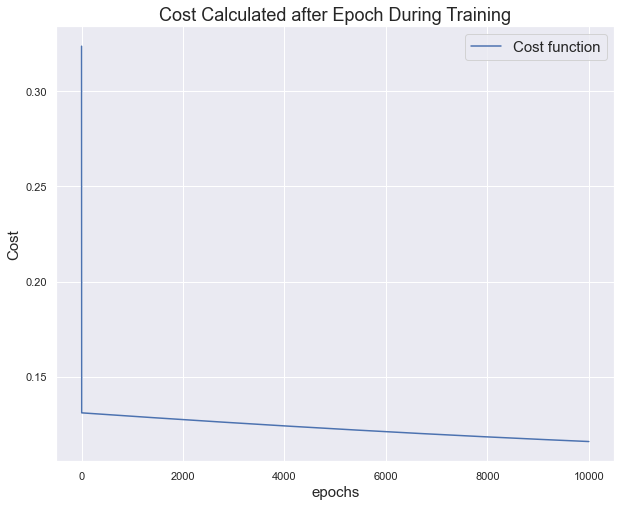

In [13]:
node.plot_cost_function()
plt.show()

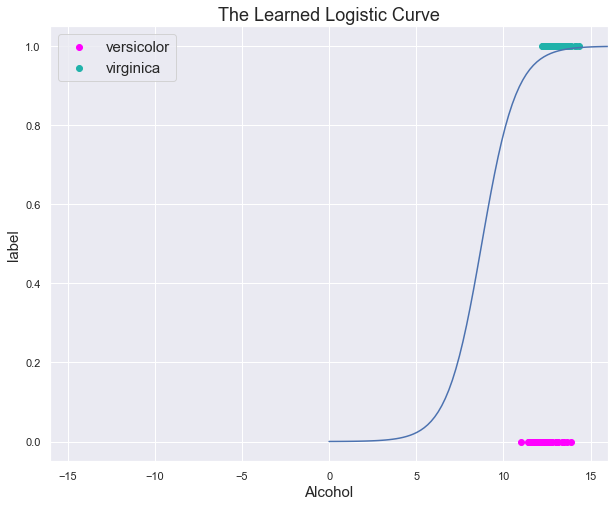

In [14]:
plt.figure(figsize = (10, 8))
plt.xlim((-16, 16 ))
plt.scatter(w2.Alcohol, 
            np.zeros(71), 
            color = "magenta", 
            label = "versicolor")
plt.scatter(w3.Alcohol, 
            np.ones(48), 
            color = "lightseagreen", 
            label = "virginica")

domain = np.linspace(0, 20, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Alcohol", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

In [15]:
node.predict(X)

array([0.97335437, 0.98035427, 0.99294171, 0.9743786 , 0.96884489,
       0.9743786 , 0.98766596, 0.9743786 , 0.99018922, 0.97003713,
       0.97229035, 0.99416282, 0.99155206, 0.986105  , 0.96179438,
       0.94901772, 0.98664584, 0.95710142, 0.97335437, 0.98148395,
       0.9632462 , 0.98184615, 0.96599219, 0.98690842, 0.95710142,
       0.98092731, 0.96853973, 0.94852867, 0.94803519, 0.96599219,
       0.96599219, 0.9632462 , 0.98130019, 0.97229035, 0.94703478,
       0.97677427, 0.95584476, 0.97229035, 0.9743786 , 0.97229035,
       0.96599219, 0.9795639 , 0.9736141 , 0.9562675 , 0.97767007,
       0.97560509, 0.9711851 , 0.98184615, 0.97032821, 0.94652778,
       0.93835312, 0.97788869, 0.95367196, 0.93537778, 0.96599219,
       0.90804755, 0.9562675 , 0.97560509, 0.98272151, 0.9632462 ,
       0.93776847, 0.94392341, 0.97560509, 0.98690842, 0.95832388,
       0.96566008, 0.97584343, 0.95498755, 0.9743786 , 0.96464487,
       0.98419386, 0.98450389, 0.98339183, 0.98148395, 0.97767

---

When using the trained weights and bias of our logistic single neuron to predict a class on a given measurement, we will need to convert the predicted probabilities to zeros and ones. This can be done by passing the ```numpy.ndarray``` returned by the ```SingleNeuron.predict()``` method into the ```numpy.rint()``` method. Moreover, we can use the resulting ```numpy.ndarray``` to compute the classification error over our training data given by the formula

$$
E_c = \frac{1}{N}\sum_{i=1}^{N}[\hat{y}^{(i)} \neq y^{(i)}],
$$

where $[\hat{y}^{(i)} \neq y^{(i)}] = 1$ whenever $\hat{y}^{(i)} \neq y^{(i)}$, and zero otherwise. Run the following code in the cell below to view this classification error. 


---

In [16]:
np.rint(node.predict(X)) != y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [17]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.5932203389830508


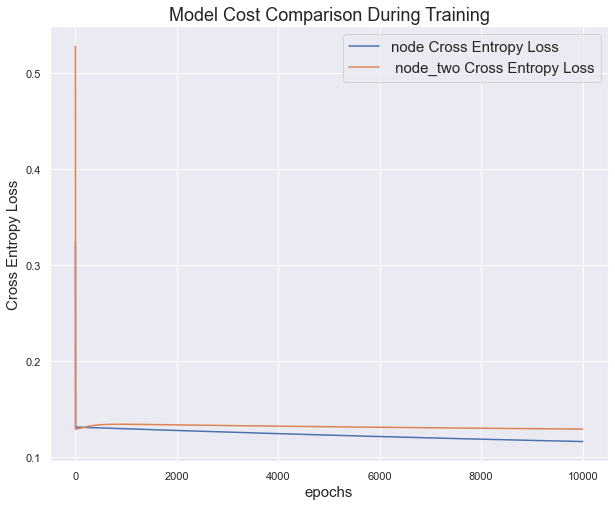

In [20]:
node_two = SingleNeuron(sigmoid, cross_entropy_loss)

X_two = df.iloc[60:][["Alcohol", "Ash"]].values

node_two.train(X_two, y, alpha = 0.01, epochs = 10_000)


plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         label = "node Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1), 
         node_two.errors_,
         label = " node_two Cross Entropy Loss")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cross Entropy Loss", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Model Cost Comparison During Training", fontsize = 18)


plt.show()

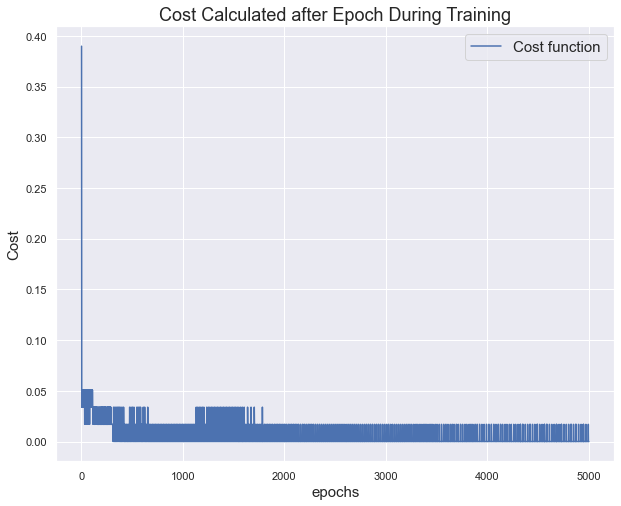

In [24]:
def sign(z):
    return np.sign(z)

def MSE(y_hat, y):
    return .5*(y_hat - y)**2

node_three = SingleNeuron(sign, MSE)

X_three = df.iloc[60:][["Alcohol", "Ash"]].values

y_three = np.where(df.iloc[60:]["Wine"] == 2, -1, 1)


node_three.train(X_three, y_three, alpha = 0.001, epochs = 5_000)

node_three.plot_cost_function()

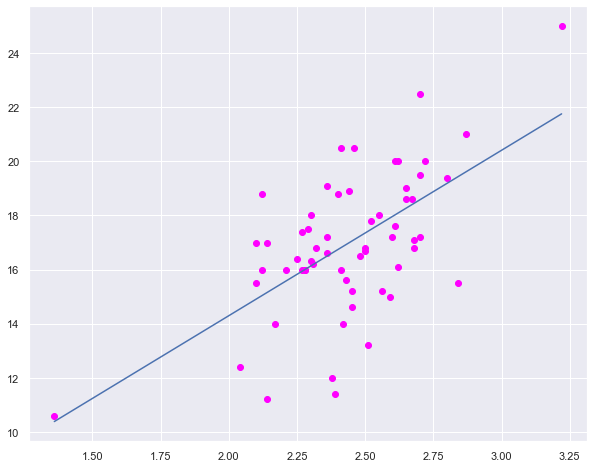

In [25]:
def linear(z):
    return z

node_four = SingleNeuron(linear, MSE)

X_four = df.iloc[0:60]["Ash"].values
X_four = X_four.reshape(-1, 1)

y_four = df.iloc[0:60]["Acl"].values

node_four.train(X_four, y_four, alpha = 0.001, epochs = 5_000)

plt.figure(figsize = (10, 8))
plt.scatter(X_four, y_four, label = "wine1", color = "magenta")

domain = np.linspace(np.min(X_four), np.max(X_four), 50)
plt.plot(domain, node_four.predict(domain.reshape(-1, 1)), label = "regression line")
plt.show()